# Initialization of packages

In [ ]:
#Installing Neccesary Packages

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import urllib.request
from google.colab import files

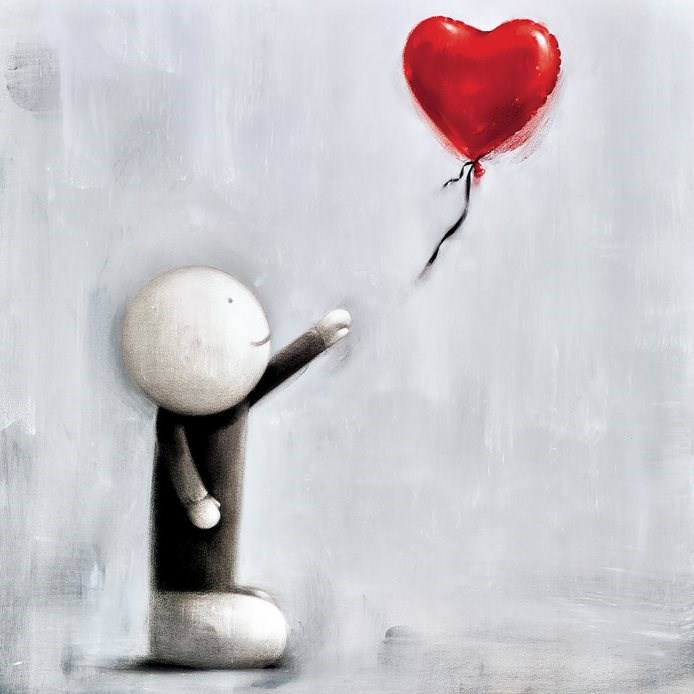

In [ ]:
#Image Input url
url = 'https://www.victoriaartgallery.co.uk/wp-content/uploads/2023/04/Hope-Love-and-Freedom.jpg'
# Loading image from URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Checking if image decoding was successful by printing the Image
if image is not None:
  cv2_imshow(image)
else:
  print("Error: Could not decode image. Please check the URL or image format.")

# **Converting image to HSV color space**

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#Defining Color range using red as target color.

In [ ]:
# Lower and upper bounds for red colourv for both arrays
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])


#Creating the binary mask

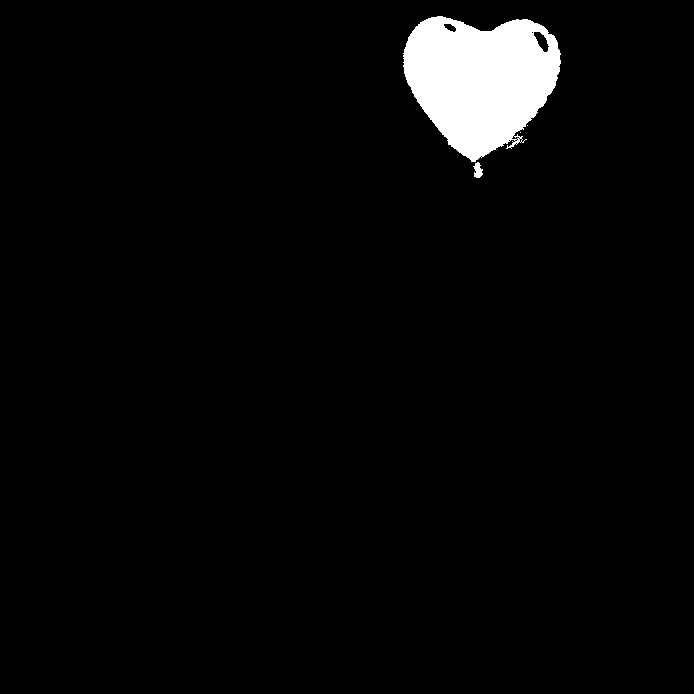

In [ ]:
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)
cv2_imshow(mask)


#Including the Morphological Operation to clean mask

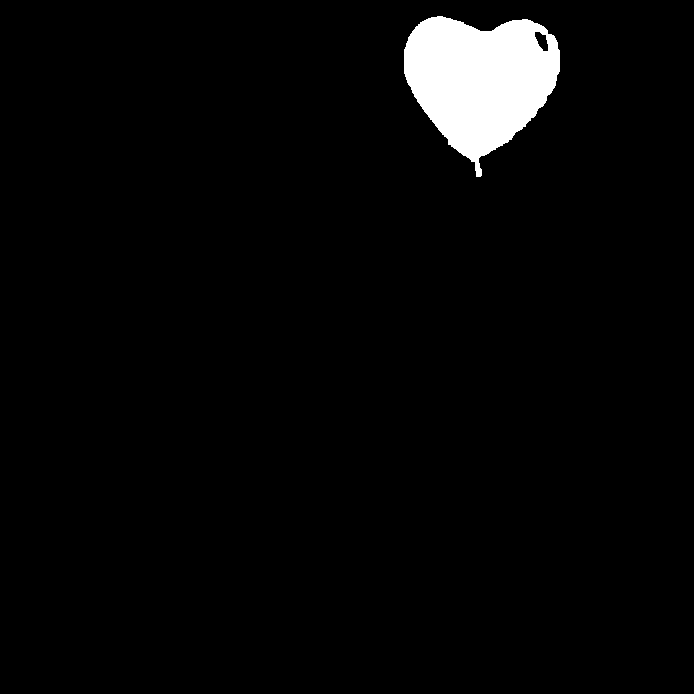

In [ ]:
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
cv2_imshow(mask)


#Finding Contour/Drawing contour on the original Image

Red region 1 area: 15903.0

Total red regions detected: 1


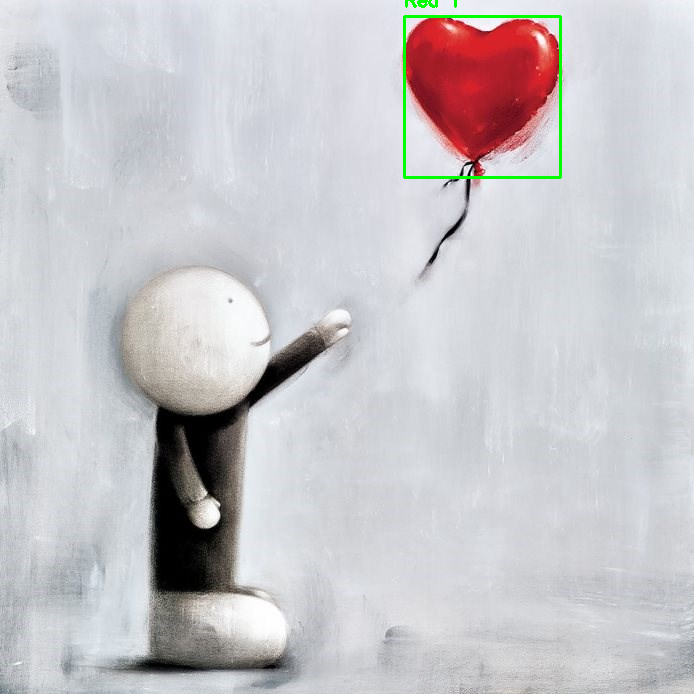

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()
count = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(output, f"Red {count+1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
        print(f"Red region {count+1} area: {area}")
        count += 1

print(f"\nTotal red regions detected: {count}")
cv2_imshow(output)



#Diplaying fProcess with final result in a grid

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_4_images(title1, img1, title2, img2, title3, img3, title4, img4):
    # Converting BGR to RGB for visualization
    def convert(img, is_bgr=True):
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if is_bgr else img

    # Creating the subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    axes[0, 0].imshow(convert(img1))
    axes[0, 0].set_title(title1)
    axes[0, 0].axis("off")

    axes[0, 1].imshow(convert(img2))
    axes[0, 1].set_title(title2)
    axes[0, 1].axis("off")

    axes[1, 0].imshow(convert(img3, is_bgr=False), cmap='gray')
    axes[1, 0].set_title(title3)
    axes[1, 0].axis("off")

    axes[1, 1].imshow(convert(img4))
    axes[1, 1].set_title(title4)
    axes[1, 1].axis("off")

    plt.tight_layout()
    plt.show()


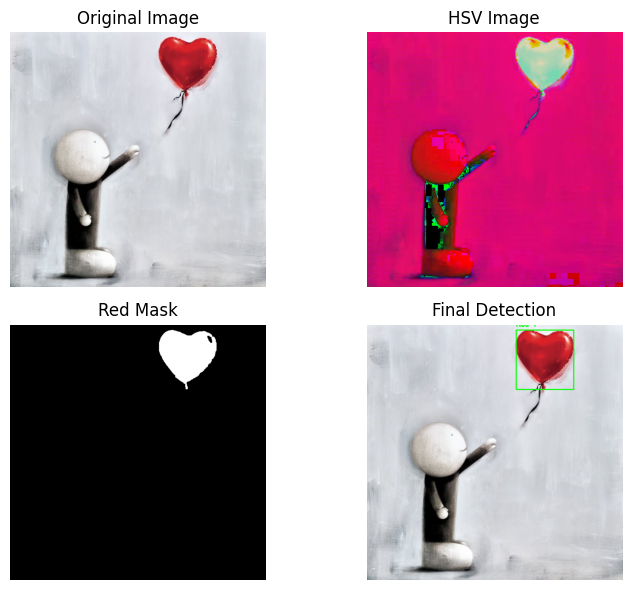

In [ ]:
# Grid Output; image, hsv, mask, output

show_4_images(
    "Original Image", image,
    "HSV Image", hsv,
    "Red Mask", mask,
    "Final Detection", output
)
